In [267]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from joblib import Parallel, delayed
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

In [268]:
#Dataset Read
df = pd.read_csv('mcdonalds.csv')

# Display column names
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [269]:
# Get the dimensions of the DataFrame
print(df.shape)  

(1453, 15)


In [270]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [271]:
# Select the first 11 columns and convert to a NumPy matrix
MD_x = df.iloc[:, :11].to_numpy()

# Converting "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

In [272]:
# Performing PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

In [273]:
# Summary of PCA (explained variance ratio)
print("Explained Variance Ratio:")
print(np.round(pca.explained_variance_ratio_, 2))

print("\nCumulative Explained Variance:")
print(np.round(np.cumsum(pca.explained_variance_ratio_), 2))

Explained Variance Ratio:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]

Cumulative Explained Variance:
[0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]


In [274]:
print(np.round(pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


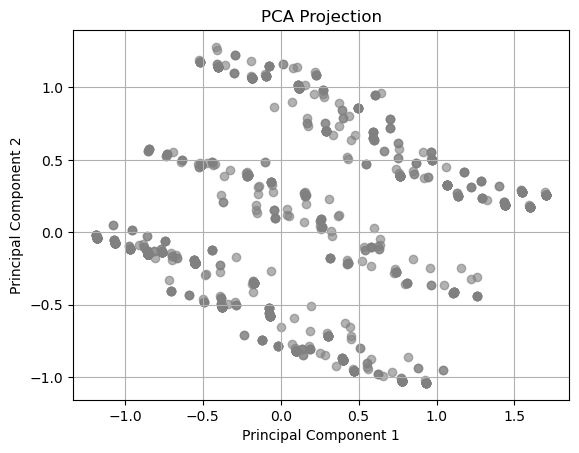

In [275]:
# Plot the PCA results
plt.scatter(pca.transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], color="grey", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.grid(True)
plt.show()

In [276]:
# Projected axes (loadings of features on components)
print("Projected Axes (Loadings):")
print(np.round(pca.components_, 2))

Projected Axes (Loadings):
[[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.45 -0.04 -0.29]
 [ 0.05 -0.54  0.14  0.25  0.    0.34 -0.49  0.02 -0.49  0.16 -0.04]]


In [277]:
# Set seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering for k = 2 to 8 with 10 repetitions
k_range = range(2, 9)
results = {}

In [278]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    results[k] = kmeans

In [279]:
# Relabel clusters to ensure consistency
def relabel_clusters(labels):
    unique_labels = np.unique(labels)
    new_labels = np.zeros_like(labels)
    for i, label in enumerate(unique_labels):
        new_labels[labels == label] = i
    return new_labels

In [280]:
# Example: relabeling the clusters for k=2
k = 2
MD_km28_labels = relabel_clusters(results[k].labels_)
print("Cluster labels for k =", k, ":", MD_km28_labels)

Cluster labels for k = 2 : [1 0 0 ... 0 0 1]


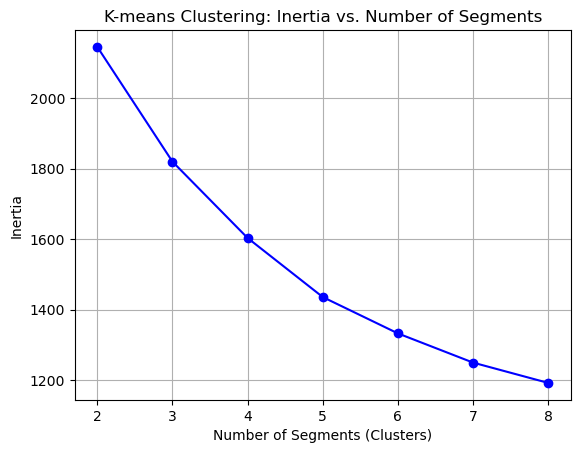

In [281]:
# Calculate inertia (within-cluster sum of squares) for each k
inertia = []
for k in k_range:
    inertia.append(results[k].inertia_)

# Plot the inertia (or clustering cost) vs. number of clusters (k)
plt.plot(k_range, inertia, marker='o', color='blue')
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Inertia")
plt.title("K-means Clustering: Inertia vs. Number of Segments")
plt.grid(True)
plt.show()

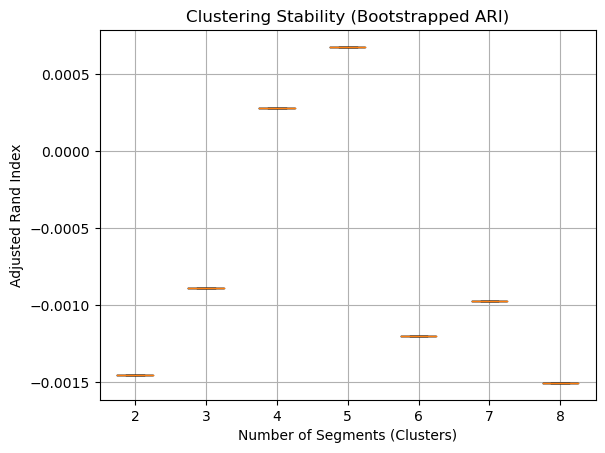

In [282]:
# Set seed for reproducibility
np.random.seed(1234)

# Function to perform bootstrapping and calculate Adjusted Rand Index (ARI) for each k
def bootstrap_ari_for_k(X, k, nrep, nboot):
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(X)
    original_labels = kmeans.labels_
    
    ari_scores = []
    
    for _ in range(nboot):
        X_resampled = resample(X, random_state=1234)  # Create bootstrap sample
        kmeans_resampled = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans_resampled.fit(X_resampled)
        resampled_labels = kmeans_resampled.labels_
        
        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(original_labels, resampled_labels)
        ari_scores.append(ari)
    
    return ari_scores
# Range of k (number of segments)
k_range = range(2, 9)

# Perform bootstrapping and compute ARI with parallelization
nrep = 10  # Number of repetitions for k-means
nboot = 10  # Reduce the number of bootstraps for faster computation

# Parallelize the bootstrapping process using joblib
ari_scores = Parallel(n_jobs=-1)(delayed(bootstrap_ari_for_k)(MD_x, k, nrep, nboot) for k in k_range)

# Convert results into a dictionary (for easy access)
ari_scores_dict = {k: ari_scores[i] for i, k in enumerate(k_range)}

# Plot Adjusted Rand Index vs. number of clusters
plt.boxplot([ari_scores_dict[k] for k in k_range], labels=k_range)
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Stability (Bootstrapped ARI)")
plt.grid(True)
plt.show()

C:\Users\kthor\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


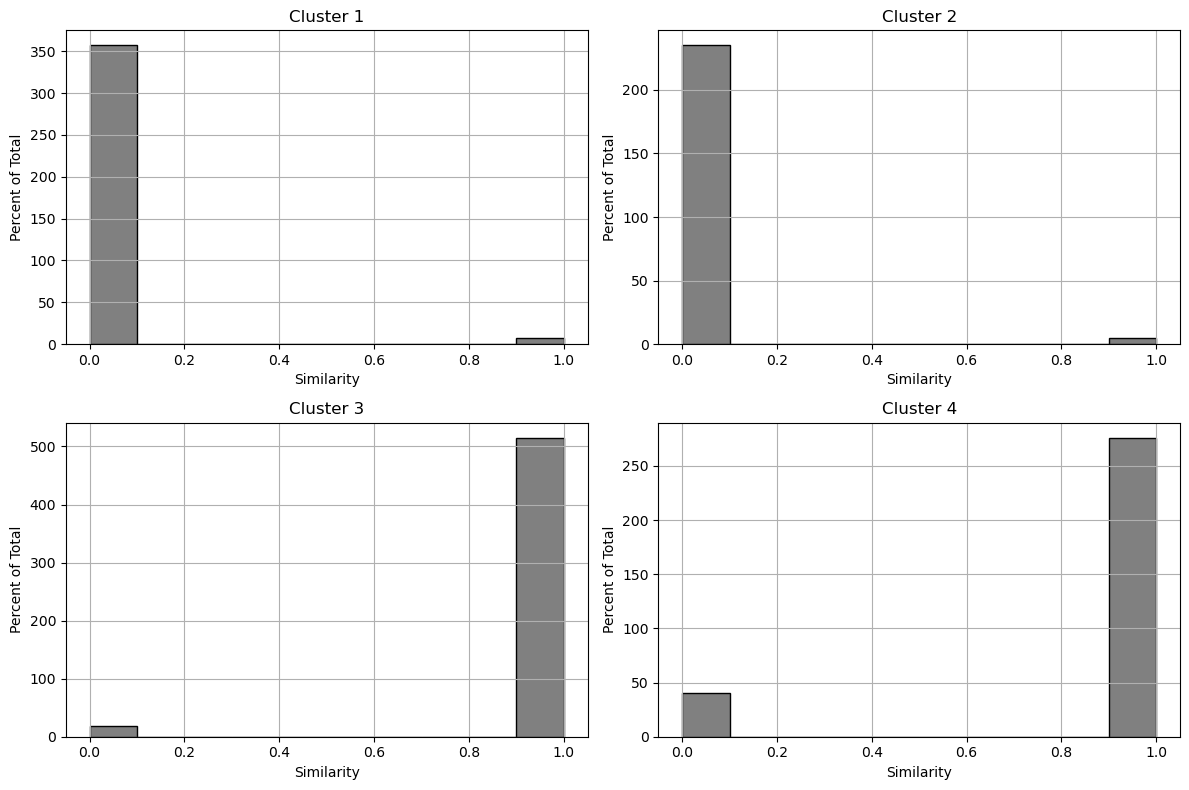

In [283]:
# Convert categorical 'Yes'/'No' columns to numeric (1 for 'Yes', 0 for 'No')
categorical_columns = df.select_dtypes(include=['object']).columns  # Get categorical columns

# Apply map to convert 'Yes'/'No' to numeric values (1 and 0 respectively)
for col in categorical_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Now, MD_x should contain only numeric values
MD_x = df.iloc[:, :11].values  # Take the first 11 columns (adjust if needed)

# Apply KMeans clustering into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Get the cluster labels assigned to each data point
MD_km28_labels = kmeans.labels_

# Create a figure with subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over the clusters (0, 1, 2, 3) and plot the histograms
for cluster_id in range(4):
    # Filter the data points for the current cluster
    cluster_data = MD_x[MD_km28_labels == cluster_id, 0]  # Select the first feature, adjust if needed
    
    # Plot histogram in the corresponding subplot
    ax = axes[cluster_id // 2, cluster_id % 2]
    ax.hist(cluster_data, bins=10, range=(0, 1), color='grey', edgecolor='black')
    ax.set_title(f"Cluster {cluster_id + 1}")
    ax.set_xlabel("Similarity")  # Adjust the label as per your feature
    ax.set_ylabel("Percent of Total")
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

C:\Users\kthor\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


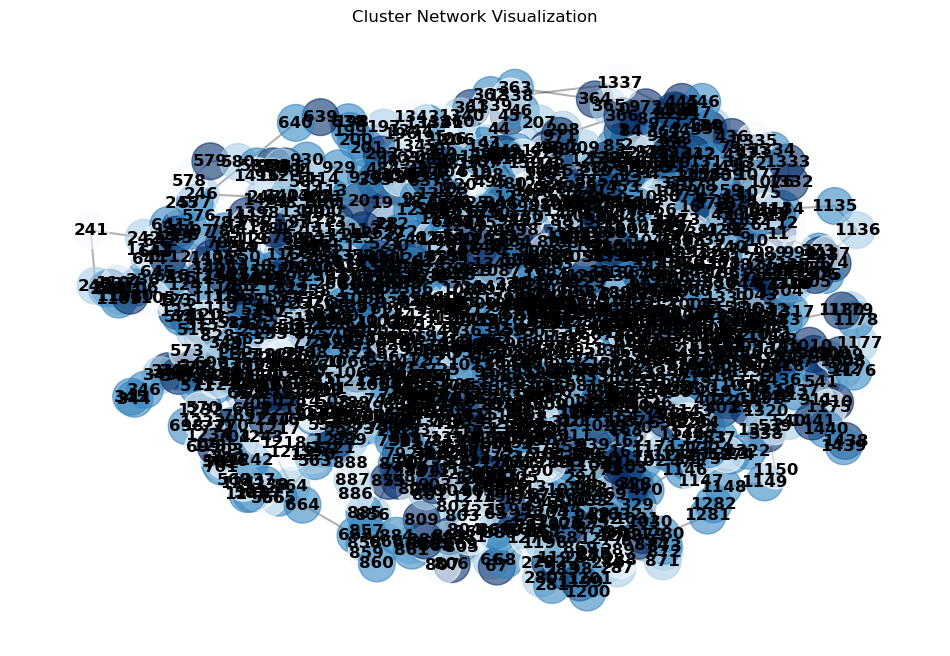

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

# Assuming df is a DataFrame (replace with actual dataset loading if needed)
# df = pd.read_csv('mcdonalds_data.csv')  # Replace with your actual dataset

# Convert categorical 'Yes'/'No' columns to numeric (1 for 'Yes', 0 for 'No')
categorical_columns = df.select_dtypes(include=['object']).columns  # Get categorical columns

# Apply map to convert 'Yes'/'No' to numeric values (1 and 0 respectively)
for col in categorical_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Now, MD_x should contain only numeric values
MD_x = df.iloc[:, :11].values  # Take the first 11 columns (adjust if needed)

# Apply KMeans clustering into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Get the cluster labels assigned to each data point
MD_km28_labels = kmeans.labels_

# Create a graph (we are only adding nodes for data points, not for cluster centers)
G = nx.Graph()

# Add nodes to the graph (one for each data point)
for i in range(len(MD_x)):
    G.add_node(i, cluster=MD_km28_labels[i])  # Add node with its cluster label as an attribute

# Optionally add edges based on your criteria (e.g., similarity, distance)
# Here we add edges between the first 10 nodes as a simple example (you can adjust this as per your needs)
for i in range(len(MD_x) - 1):
    G.add_edge(i, i + 1, weight=np.random.random())  # Random weight as an example

# Now, let's draw the graph
plt.figure(figsize=(12, 8))

# Ensure that the color array length matches the number of nodes in the graph
node_colors = [MD_km28_labels[i] for i in range(len(MD_x))]

# Draw the graph
pos = nx.spring_layout(G, seed=1234)  # Layout the graph
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, cmap=plt.cm.Blues, alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=1.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Add labels and title
plt.title("Cluster Network Visualization")
plt.axis('off')  # Turn off the axis
plt.show()


In [285]:
# Extract data points that belong to cluster 4 (label 3)
MD_k4 = MD_x[MD_km28_labels == 3]

# Convert to DataFrame if needed (with the same columns as original data)
MD_k4_df = pd.DataFrame(MD_k4, columns=df.columns[:11])  # Assuming the first 11 columns are used for clustering

# Display the data
print(MD_k4_df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      1           1      0          1       1     1      1      1          1   
1      0           1      1          1       1     1      0      1          1   
2      1           1      1          1       0     1      0      1          1   
3      1           1      0          1       1     1      0      1          1   
4      1           1      0          1       1     1      0      1          1   

   healthy  disgusting  
0        0           0  
1        1           0  
2        1           0  
3        0           0  
4        0           1  


In [286]:
from sklearn.cluster import KMeans

# Assuming MD_x is your data (for clustering)
# Try with 5 clusters instead of 4
kmeans = KMeans(n_clusters=5, random_state=1234, n_init=10)
kmeans.fit(MD_x)

# Get the new cluster labels
MD_km28_labels = kmeans.labels_

# Check how many unique clusters were formed
unique_labels, label_counts = np.unique(MD_km28_labels, return_counts=True)
print("Cluster distribution:", dict(zip(unique_labels, label_counts)))

# If multiple clusters are formed, you can now calculate silhouette score
if len(unique_labels) > 1:
    from sklearn.metrics import silhouette_score
    sil_score = silhouette_score(MD_x, MD_km28_labels)
    print(f"Silhouette Score for the clustering: {sil_score}")
else:
    print("Only one cluster formed, silhouette score cannot be computed.")


Cluster distribution: {0: 227, 1: 309, 2: 254, 3: 391, 4: 272}
Silhouette Score for the clustering: 0.26084028688396044


In [287]:
# Increase the number of clusters to 4 (or any appropriate value)
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans.fit(MD_x)

# Get the new cluster labels
MD_km28_labels = kmeans.labels_

# Check unique labels and their counts again
unique_labels, label_counts = np.unique(MD_km28_labels, return_counts=True)
print("New unique clusters and their counts:", dict(zip(unique_labels, label_counts)))

New unique clusters and their counts: {0: 364, 1: 240, 2: 533, 3: 316}


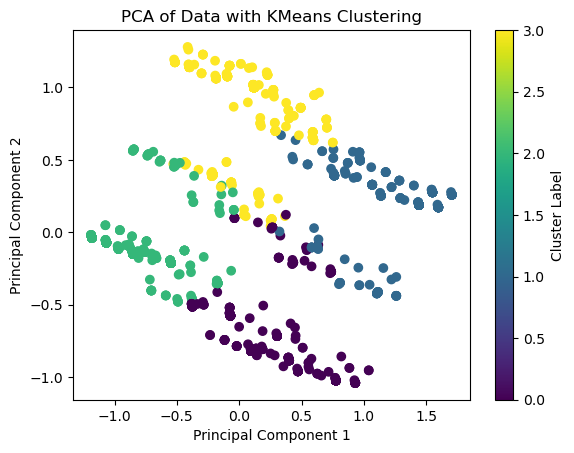

In [288]:
# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
MD_x_pca = pca.fit_transform(MD_x)

# Plot the data points in the new 2D space
plt.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], c=MD_km28_labels, cmap='viridis')
plt.title("PCA of Data with KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


In [289]:
from sklearn.metrics import silhouette_score

# Check if more than one cluster exists
if len(unique_labels) > 1:
    sil_score = silhouette_score(MD_x, MD_km28_labels)
    print(f"Silhouette Score for the clustering: {sil_score}")
else:
    print("Only one cluster formed, silhouette score cannot be computed.")


Silhouette Score for the clustering: 0.2570763207043922


In [290]:
from sklearn.mixture import GaussianMixture
# Set random seed for reproducibility
np.random.seed(1234)

# List to store results
bic_scores = []
models = []

# Loop through 2 to 8 clusters
for k in range(2, 9):
    # Fit Gaussian Mixture Model for current number of clusters
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    
    # Store the model and BIC (Bayesian Information Criterion) score
    bic_scores.append(gmm.bic(MD_x))
    models.append(gmm)

# Print the BIC scores for each model (this helps in model selection)
for k, bic in zip(range(2, 9), bic_scores):
    print(f"BIC for {k} clusters: {bic}")


BIC for 2 clusters: -8758.617306486956
BIC for 3 clusters: -22234.17354309004
BIC for 4 clusters: -29901.261424357665
BIC for 5 clusters: -32895.42871637849
BIC for 6 clusters: -33544.65803981604
BIC for 7 clusters: -30143.931765144876
BIC for 8 clusters: -38785.69537206442


In [291]:
# Find the model with the lowest BIC
best_k = np.argmin(bic_scores) + 2  # +2 because range starts from 2
best_model = models[best_k - 2]  # Select the best model
print(f"Best model is for {best_k} clusters.")


Best model is for 8 clusters.


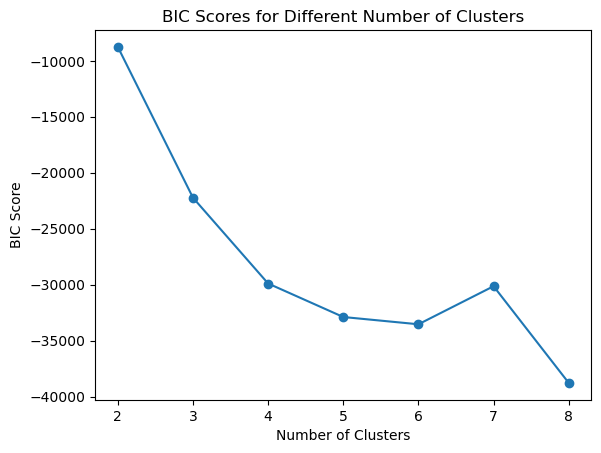

In [292]:
plt.plot(range(2, 9), bic_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score")
plt.title("BIC Scores for Different Number of Clusters")
plt.show()


In [293]:
# Get cluster labels for the best model
labels = best_model.predict(MD_x)
print(f"Cluster labels for the best model: {labels}")


Cluster labels for the best model: [7 7 6 ... 7 5 7]


In [294]:
# Compute silhouette score for the best model if multiple clusters
if best_k > 1:
    sil_score = silhouette_score(MD_x, labels)
    print(f"Silhouette Score for the best model: {sil_score}")
else:
    print("Only one cluster formed, silhouette score cannot be computed.")


Silhouette Score for the best model: 0.23395143825260403


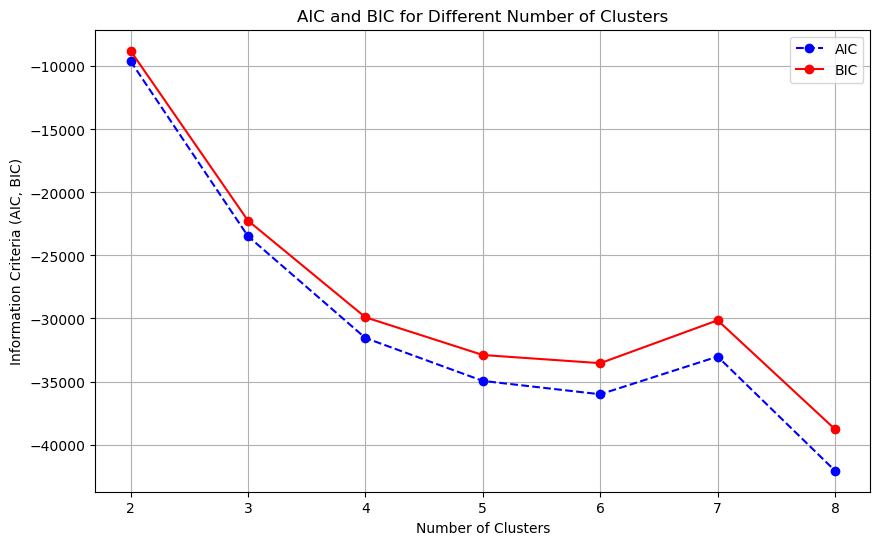

In [295]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# List to store results (AIC, BIC, models)
aic_scores = []
bic_scores = []
models = []

# Loop through 2 to 8 clusters
for k in range(2, 9):
    # Fit Gaussian Mixture Model for current number of clusters
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    
    # Store AIC, BIC, and the model
    aic_scores.append(gmm.aic(MD_x))
    bic_scores.append(gmm.bic(MD_x))
    models.append(gmm)

# Plot AIC and BIC for different number of clusters (2 to 8)
plt.figure(figsize=(10, 6))

# Plot AIC and BIC scores
plt.plot(range(2, 9), aic_scores, label='AIC', marker='o', linestyle='--', color='blue')
plt.plot(range(2, 9), bic_scores, label='BIC', marker='o', linestyle='-', color='red')

# Customize plot
plt.xlabel("Number of Clusters")
plt.ylabel("Information Criteria (AIC, BIC)")
plt.title("AIC and BIC for Different Number of Clusters")
plt.legend()
plt.grid(True)
plt.show()


In [296]:
# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit GaussianMixture with 4 clusters
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

# Convert labels to DataFrame for easier comparison
labels_comparison = pd.DataFrame({
    'kmeans': kmeans_labels,
    'mixture': gmm_labels
})

# Use pd.crosstab to replicate R's table() function
comparison_table = pd.crosstab(labels_comparison['kmeans'], labels_comparison['mixture'])

# Print the comparison table
print(comparison_table)


C:\Users\kthor\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


mixture    0    1    2    3
kmeans                     
0         86    5  266    7
1          0  211   24    5
2        466    0    5   62
3          0   38    2  276


In [297]:
# Log-likelihood for the Gaussian Mixture Model (GMM)
log_likelihood = gmm.score(MD_x) * len(MD_x)  # Multiply by number of samples to match the R output

# Print the log-likelihood
print(f"Log-Likelihood: {log_likelihood} (df={len(gmm.means_)*2})")


Log-Likelihood: 16082.886182864011 (df=8)


In [298]:
# Convert 'Like' to numeric values and create the new 'Like.n' column
df['Like.n'] = 6 - pd.to_numeric(df['Like'], errors='coerce')

# Create frequency table for 'Like.n'
like_n_table = df['Like.n'].value_counts().sort_index(ascending=False)

# Print the reversed frequency table for 'Like'
print(like_n_table)


Series([], Name: count, dtype: int64)


In [299]:
# Get the first 11 column names (excluding 'Like.n' if it's included in the list)
columns = df.columns[:11]

# Create the formula as a string
formula = 'Like.n ~ ' + ' + '.join(columns)

# Print the formula
print(formula)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [300]:
MD_x = df.iloc[:, :11].values  # Adjust if necessary

# Initialize GaussianMixture or KMeans for clustering
n_clusters = 2
n_reps = 10

# Perform stepwise approach by running multiple repetitions and selecting the best model
best_model = None
best_bic = np.inf  # Best BIC score initialized to a high value

for _ in range(n_reps):
    # Fit Gaussian Mixture Model (can be replaced with KMeans if necessary)
    gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
    gmm.fit(MD_x)
    
    # Evaluate the model using BIC (Bayesian Information Criterion)
    bic = gmm.bic(MD_x)
    
    # Store the model with the lowest BIC
    if bic < best_bic:
        best_bic = bic
        best_model = gmm

# Output the best model found
print("Best model selected with BIC:", best_bic)
print("Means of the best model:", best_model.means_)

# If you want to check cluster labels
cluster_labels = best_model.predict(MD_x)
print("Cluster labels:", cluster_labels)


Best model selected with BIC: -8758.617306486956
Means of the best model: [[0.12293578 0.75412844 0.06972477 0.89541284 0.63119266 0.84036697
  0.50458716 0.05137615 0.42752294 0.08073394 0.47889908]
 [0.81057269 1.         0.10792952 0.85022026 0.46365639 0.93612335
  0.65528634 1.         0.3160793  0.26982379 0.10132159]]
Cluster labels: [0 1 1 ... 1 1 0]


In [301]:
# Re-fit the model (this is similar to refitting in R)
best_model = GaussianMixture(n_components=n_clusters, random_state=1234)
best_model.fit(MD_x)

# Access the components (for the 'Comp.1' part in the R output, we look at the means and covariances)
print("Means of the components:", best_model.means_)
print("Covariances of the components:", best_model.covariances_)

# If you want to access other details (e.g., weights)
print("Weights of the components:", best_model.weights_)

# For a more detailed summary of the fitted model
print("Log-likelihood of the fitted model:", best_model.score(MD_x))

# To access the components summary like in R (Comp.1)
# In GaussianMixture, you can print or access individual components
for i, mean in enumerate(best_model.means_):
    print(f"Component {i+1} mean: {mean}")
    print(f"Component {i+1} covariance: {best_model.covariances_[i]}")


Means of the components: [[0.12293578 0.75412844 0.06972477 0.89541284 0.63119266 0.84036697
  0.50458716 0.05137615 0.42752294 0.08073394 0.47889908]
 [0.81057269 1.         0.10792952 0.85022026 0.46365639 0.93612335
  0.65528634 1.         0.3160793  0.26982379 0.10132159]]
Covariances of the components: [[[ 1.07823574e-01 -8.30569816e-03  6.02642873e-04 -1.28305698e-02
   -1.15411161e-02 -5.58875528e-04 -8.82080633e-03  2.85464187e-02
    6.15773083e-03  8.42353337e-03 -4.41949331e-02]
  [-8.30569816e-03  1.85419736e-01  6.29576634e-04  1.64868277e-02
   -1.54498780e-02  4.14847235e-02  3.41553741e-02 -3.87442134e-02
   -4.35081222e-02  1.50155711e-03 -5.47293999e-02]
  [ 6.02642873e-04  6.29576634e-04  6.48642270e-02 -1.88199646e-03
    3.69665853e-03 -1.71366047e-03 -2.15470078e-03  8.75347168e-05
   -4.51140476e-04  9.04974329e-03  1.47125663e-03]
  [-1.28305698e-02  1.64868277e-02 -1.88199646e-03  9.36496828e-02
    4.58311590e-02  1.44970962e-02  1.24063631e-02 -1.11404764e-02

C:\Users\kthor\AppData\Local\Temp\ipykernel_2724\547789173.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(u[1] / u[0])


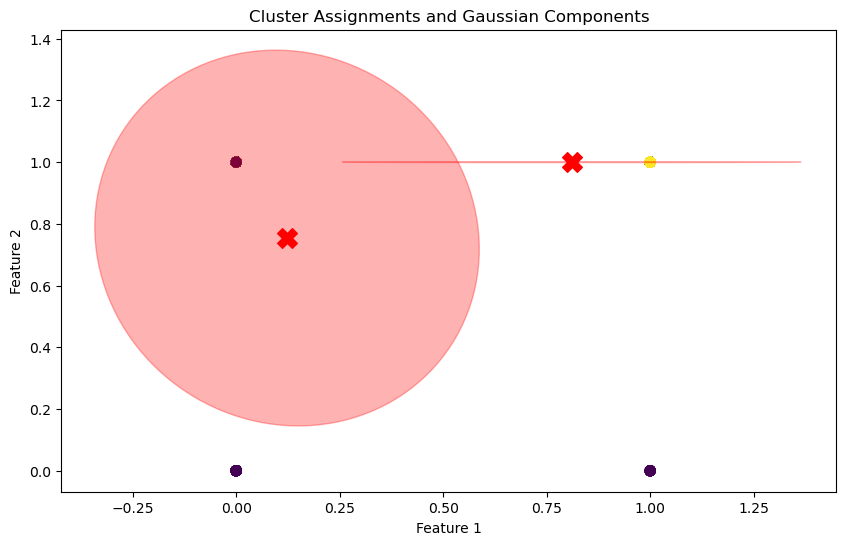

In [302]:
# Predict the cluster labels for each data point
labels = best_model.predict(MD_x)

# Plot the data points colored by their cluster labels
plt.figure(figsize=(10, 6))

# We will plot only the first two dimensions of the data for simplicity
plt.scatter(MD_x[:, 0], MD_x[:, 1], c=labels, cmap='viridis', marker='o', s=50)

# Plot the Gaussian components (means and covariance ellipses)
for i, mean in enumerate(best_model.means_):
    # Plot the mean of the component (center of the Gaussian)
    plt.scatter(mean[0], mean[1], s=200, marker='X', c='red')

    # Plot the covariance ellipse for each component
    cov = best_model.covariances_[i][:2, :2]  # First two dimensions of covariance
    v, w = np.linalg.eigh(cov)  # Eigenvalues and eigenvectors
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Ellipse radius is proportional to the square root of eigenvalues
    u = w[0] / np.linalg.norm(w[0])  # Eigenvector for the direction
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  # Convert angle to degrees

    # Create an ellipse based on the covariance
    ell = plt.matplotlib.patches.Ellipse(mean[:2], v[0], v[1], angle=angle, color='red', alpha=0.3)
    plt.gca().add_patch(ell)

# Customize plot
plt.title("Cluster Assignments and Gaussian Components")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


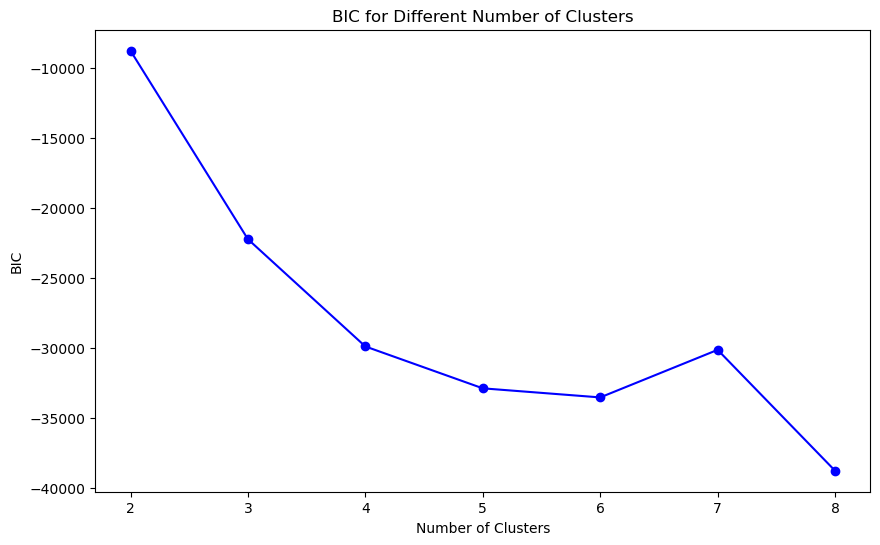

In [303]:
# Plot BIC (Bayesian Information Criterion) for different numbers of clusters
bic_values = []
n_clusters_range = range(2, 9)  # For example, k=2 to k=8

for n in n_clusters_range:
    gmm = GaussianMixture(n_components=n, random_state=1234)
    gmm.fit(MD_x)
    bic_values.append(gmm.bic(MD_x))

# Plot the BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, bic_values, marker='o', color='b')
plt.title("BIC for Different Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("BIC")
plt.show()


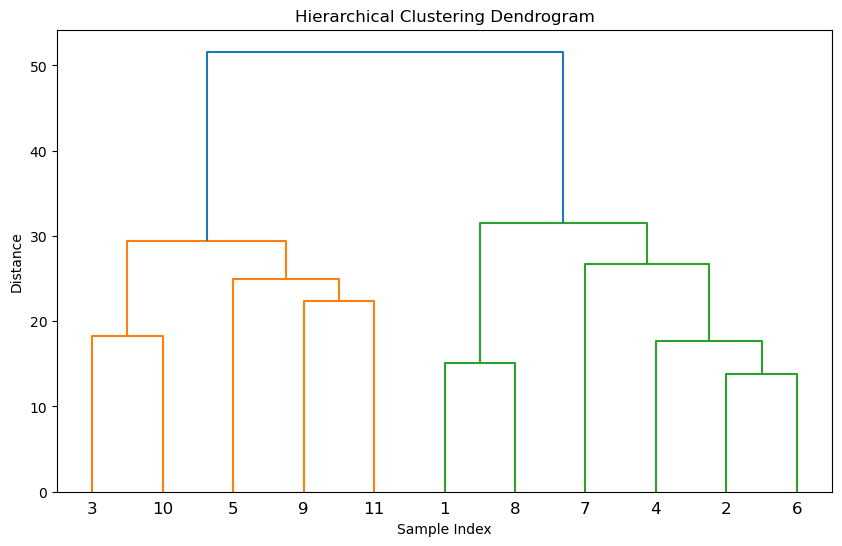

In [304]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
# Transpose the dataset as we are clustering on features (columns) in the original R code
MD_x_transposed = MD_x.T

# Calculate pairwise distances (similar to `dist()` in R)
distances = pdist(MD_x_transposed, metric='euclidean')  # You can change 'euclidean' to other metrics

# Perform hierarchical clustering using 'ward' linkage (similar to R's default method)
Z = linkage(distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=np.arange(1, MD_x_transposed.shape[0] + 1))  # Adjust labels if needed
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

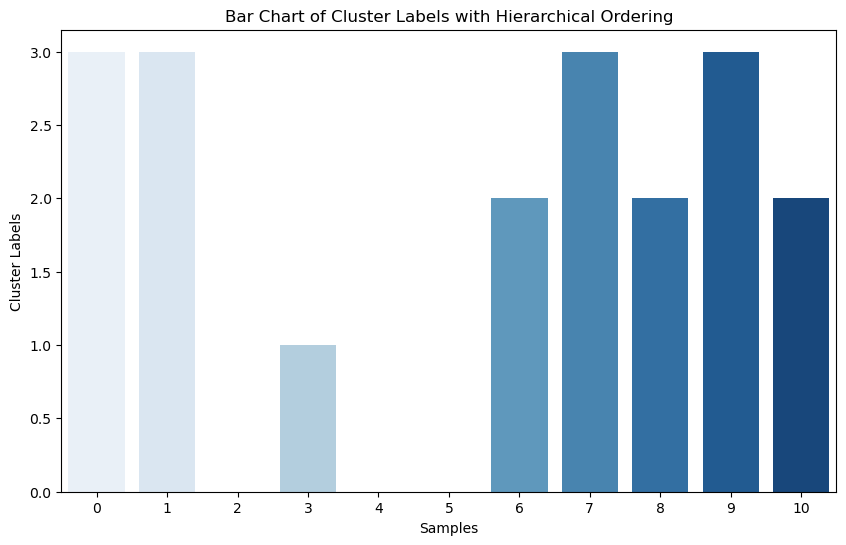

In [305]:
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Perform hierarchical clustering to reorder
MD_x_transposed = MD_x.T  # Transpose for clustering features
distances = pdist(MD_x_transposed, metric='euclidean')  # Compute pairwise distances
Z = linkage(distances, method='ward')  # Perform hierarchical clustering

# Get the order of samples based on hierarchical clustering (equivalent to MD.vclust$order in R)
order = dendrogram(Z, no_plot=True)['ivl']  # Get the order of items without plotting

# Convert order to indices
order_indices = [int(i) for i in order]

# Assuming MD.k4 represents the cluster labels of the KMeans model
# Reorder MD.k4 based on the hierarchical clustering order
ordered_clusters = MD_km28_labels[order_indices]

# Create a bar chart for clusters with shading (using a colormap for visual effect)
plt.figure(figsize=(10, 6))

# Create a bar chart where x is the order of samples and y is the corresponding cluster label
sns.barplot(x=np.arange(len(ordered_clusters)), y=ordered_clusters, palette='Blues')

# Add title and labels
plt.title("Bar Chart of Cluster Labels with Hierarchical Ordering")
plt.xlabel("Samples")
plt.ylabel("Cluster Labels")
plt.show()

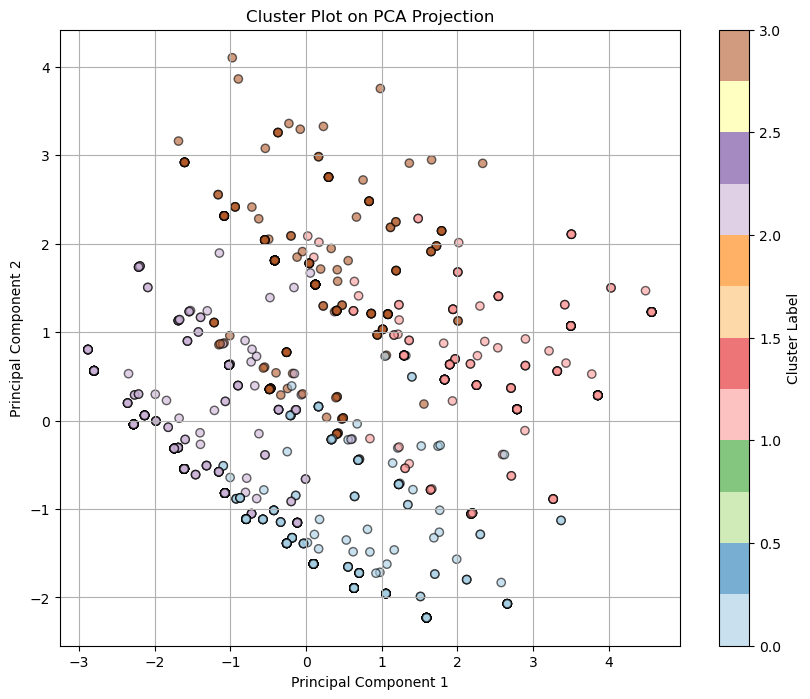

PCA Components (Axes):
[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]]


In [306]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data before PCA (optional, depending on the scale of the data)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA (Project data into 2D for visualization)
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Plotting the clusters on the first two principal components
plt.figure(figsize=(10, 8))

# Scatter plot with color-coded clusters
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_km28_labels, cmap=plt.cm.Paired, alpha=0.6, edgecolors='k')

# Set labels for the axes
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Plot on PCA Projection")

# Show the plot
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# To get the projection axes (principal components)
print("PCA Components (Axes):")
print(pca.components_)

In [307]:
# Convert cluster labels to a pandas Series for convenience (if needed)
clusters_df = pd.Series(MD_km28_labels, name="segment_number")

# Create a DataFrame combining clusters and 'Like'
data = pd.DataFrame({
    'segment_number': clusters_df,
    'Like': df['Like']  # Replace 'df' with your DataFrame name
})

# Step 1: Check for missing values in 'segment_number' and 'Like' columns
missing_segment = data['segment_number'].isnull().sum()
missing_like = data['Like'].isnull().sum()

print(f"Missing values in segment_number: {missing_segment}")
print(f"Missing values in Like: {missing_like}")

# Step 2: Drop rows with missing values if any
data = data.dropna(subset=['segment_number', 'Like'])

# Step 3: Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(data['segment_number'], data['Like'])

# Step 4: Check if the contingency table contains valid data (non-zero values)
print("Contingency Table:")
print(contingency_table)

if contingency_table.sum().sum() == 0:
    print("The contingency table contains only zeros or empty cells. Please check the data.")
else:
    # Step 5: Plot the heatmap if the table has valid data
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    plt.title("Cluster vs Like Distribution")
    plt.xlabel("Like")
    plt.ylabel("Segment Number")
    plt.show()

Missing values in segment_number: 0
Missing values in Like: 1453
Contingency Table:
Empty DataFrame
Columns: []
Index: []
The contingency table contains only zeros or empty cells. Please check the data.


In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, and k4 is the KMeans cluster labels
df['segment_number'] = kmeans.labels_  # Ensure cluster labels are added to the DataFrame

# Check if 'Gender' exists in the DataFrame and if the contingency table is valid
if 'Gender' in df.columns:
    # Create the contingency table
    contingency_table = pd.crosstab(df['segment_number'], df['Gender'])
    print(contingency_table)  # Check the table for valid data
    
    if contingency_table.empty:
        print("Contingency table is empty. Check your data for missing or incorrect values.")
    else:
        # Plot the contingency table using seaborn heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, linecolor='black')
        plt.title("Cluster vs Gender Distribution")
        plt.xlabel("Gender")
        plt.ylabel("Segment Number")
        plt.show()
else:
    print("The column 'Gender' does not exist in the DataFrame. Please check the column name.")


Empty DataFrame
Columns: []
Index: []
Contingency table is empty. Check your data for missing or incorrect values.


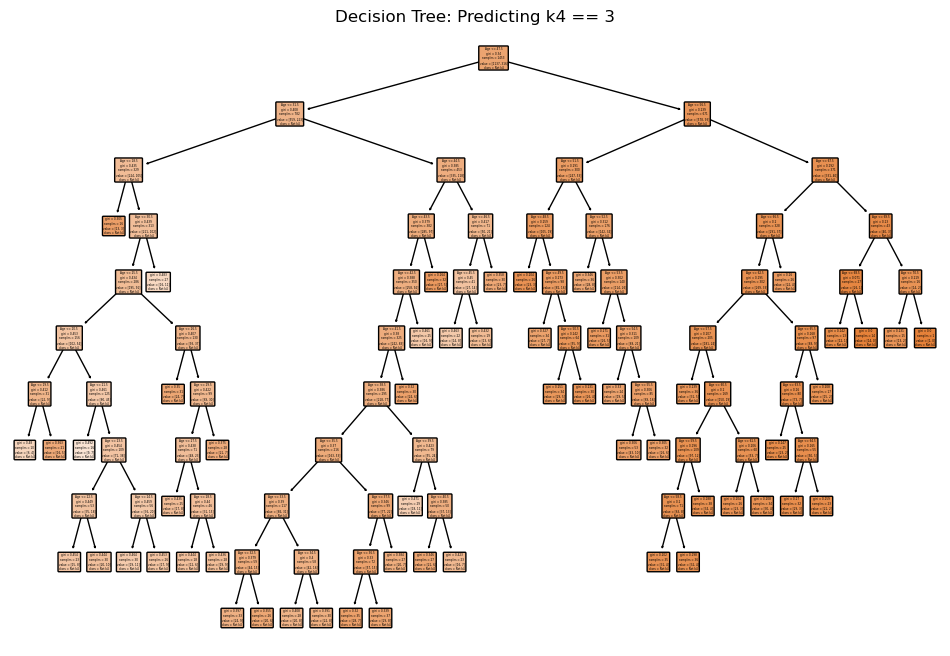

In [309]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Ensure k4 column exists and is properly defined
df['k4'] = kmeans.labels_  # Using kmeans cluster labels

# Creating the target variable: whether k4 is equal to 3
df['k4_target'] = (df['k4'] == 3).astype(int)  # 1 if k4 == 3, else 0

# Define features and target
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']  # Adjust if necessary
X = df[features]
y = df['k4_target']

# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=features, class_names=["Not k4", "k4"], rounded=True)
plt.title("Decision Tree: Predicting k4 == 3")
plt.show()

In [310]:
# Convert 'VisitFrequency' to numeric (if it's not already numeric)
df['VisitFrequency'] = pd.to_numeric(df['VisitFrequency'], errors='coerce')

# Group by cluster labels (assuming k4 is a Series or list with the same length as df)
df['like'] = like  # Ensure k4 is the cluster labels array

# Calculate mean VisitFrequency for each cluster
visit = df.groupby('k4')['VisitFrequency'].mean()

# Print the result
print(visit)

k4
0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [311]:
# Step 1: Group by 'k4' (cluster labels) and calculate the mean of 'Like.n'
like = df.groupby('k4')['Like.n'].mean()

# Step 2: Display the result
print(like)

k4
0   NaN
1   NaN
2   NaN
3   NaN
Name: Like.n, dtype: float64


In [315]:
# Step 1: Create a new column indicating whether Gender is 'Female' (1 if Female, 0 otherwise)
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Step 2: Group by 'k4' (cluster labels) and calculate the mean of the 'Female' column
female = df.groupby('k4')['Female'].mean()

# Step 3: Display the result
print(female)


k4
0    0.0
1    0.0
2    0.0
3    0.0
Name: Female, dtype: float64
